# SYSTOLICBP DATA SET #

## IMPORT MODULES ##

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
import math
from pandas.stats.api import ols
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as m_sel
import plotly.offline as plot
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.utils import shuffle
plot.offline.init_notebook_mode(connected=True)

## LOAD DATA ##

In [6]:
data_df = pd.read_csv('/home/user/Downloads/Ex03_SystolicBP_Regreesion.csv')
data_df = shuffle(data_df)
data_df.dropna(axis = 0, inplace=True)

## CORRELATION MATRIX ##

In [7]:
correlation_matrix = data_df.corr()
correlation_matrix

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
Age,1.000000,-0.072606,0.075297,0.004664,-0.114006,-0.028380,0.151895,-0.126357,0.669539
Treated,-0.072606,1.000000,0.050122,-0.052271,-0.117269,-0.006899,-0.069158,0.033868,0.476901
Gender,0.075297,0.050122,1.000000,-0.152274,-0.004839,-0.003728,-0.002139,-0.007238,0.083053
FamilySize,0.004664,-0.052271,-0.152274,1.000000,0.071975,-0.038084,-0.178930,0.088567,0.020711
Diet,-0.114006,-0.117269,-0.004839,0.071975,1.000000,0.214507,-0.030904,0.150477,-0.071370
Weight,-0.028380,-0.006899,-0.003728,-0.038084,0.214507,1.000000,-0.100371,0.725423,0.361718
Height,0.151895,-0.069158,-0.002139,-0.178930,-0.030904,-0.100371,1.000000,-0.746394,-0.307311
ScaledBMI,-0.126357,0.033868,-0.007238,0.088567,0.150477,0.725423,-0.746394,1.000000,0.447285
SystolicBP,0.669539,0.476901,0.083053,0.020711,-0.071370,0.361718,-0.307311,0.447285,1.000000


## CORRELATION GRAPH ##

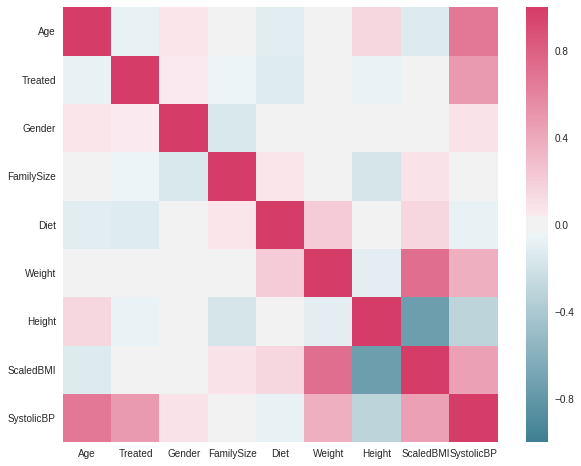

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 1, as_cmap=True),
            square=True, ax=ax)
plt.show()

## SCATTER GRAPH ##

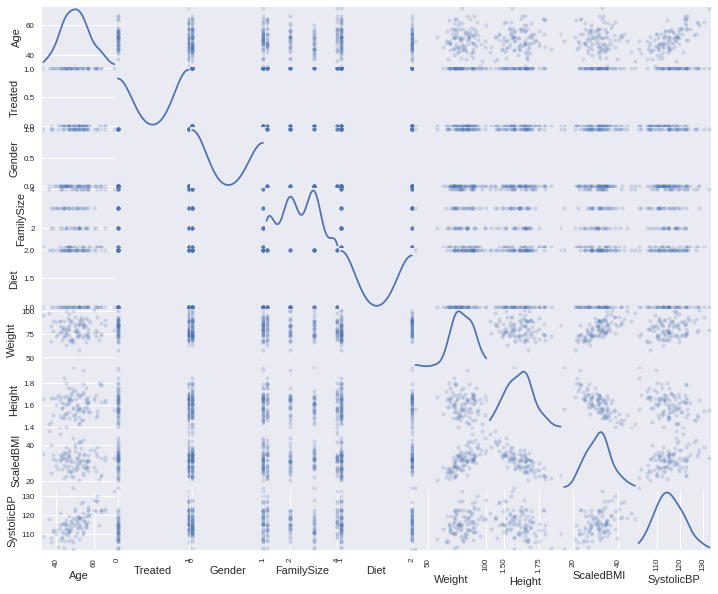

In [9]:
pd.scatter_matrix(data_df, alpha=.2, figsize=(12,10), diagonal='kde')
plt.show()

## NORMALIZING DATA ##

In [10]:
data_norm=data_df
for i in data_norm.columns.tolist():
    data_norm[i] = (data_norm[i] - data_norm[i].mean())/(data_norm[i].var())

## SPLITTING TRAINING AND TESTING DATA ##

In [11]:
X_rl = pd.get_dummies(data_norm).drop('SystolicBP', axis=1)
y_rl = data_norm.SystolicBP
X_train, X_test , Y_train, Y_test = m_sel.train_test_split(X_rl, y_rl, test_size=0.30, random_state=20)

## LINEAR REGRESSION MODEL ##

In [12]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train, Y_train)
print ('Coefficients : ', reg.coef_) 
print ('\nIntercepts  : ', reg.intercept_)
print ('\nRoot Mean Square Error : ', math.sqrt(np.mean((reg.predict(X_test) - Y_test) ** 2)))

Coefficients :  [  9.21366915e-01   4.12231189e-02   1.45637129e-04  -6.72021770e-04
  -2.48176107e-04  -7.09462261e-03   2.43233649e-04   5.01656340e-01]

Intercepts  :  -0.000176856456387

Root Mean Square Error :  0.0037197199617061928


## REGRESSION MODEL PLOT ##

In [13]:
trace1 = go.Scatter(
    x=reg.predict(X_test),
    y= Y_test,
    mode='markers',
    name = 'Predicted vs Original',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x= Y_test,
    y= Y_test,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace1, trace2]
layout = dict(
    title='SCATTER PLOT FOR REGRESSION MODEL',
    xaxis=dict(
        title='PREDICTED VALUE '
    ),
    yaxis=dict(
        title='ORIGINAL VALUE'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='SYTOLICBP_Regression Model')


## HISTOGRAM FOR REGRESSION ##

In [14]:
data = [go.Histogram(x=((reg.predict(X_test) - Y_test)))]
layout = go.Layout(
    title='FREQUENCY OF RESIDUALS',
    xaxis=dict(
        title='RESIDUALS'
    ),
    yaxis=dict(
        title='FREQUENCY'
    )
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='histogram')

## BOX PLOT FOR REGRESSION ##

In [15]:
trace1 = go.Box(
    y = (reg.predict(X_test) - Y_test)
)
data = [trace1]
plot.iplot(data)

## RIDGE REGRESSION ##

In [16]:
alphas = np.logspace(-3,3,300)
ridge = linear_model.Ridge(normalize=True)
coefs = []
mean_errors = []

column_name1 = X_train.columns.tolist()
column_name = column_name1
column_name.append('alpha')
df = pd.DataFrame(index=list(range(len(alphas))),columns=column_name)
s = 0
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,Y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test) 
    mean_errors.append(mean_squared_error(Y_test, pred))
    k=0
    while (k < len(column_name)-1):
        df.loc[s,list(df.columns)[k]] = ridge.coef_[k]
        k = k+1
    df.loc[s,'alpha'] =a    
    s=s+1
m=column_name1.pop()   

## WEIGHT VS ALPHA ##

In [18]:
data = []
for i in column_name1:
    p = go.Scatter(x= df.alpha, y= df.loc[:,i].tolist(), mode='lines+markers', name=i, hoverinfo='name', line=dict(shape='linear'))
    data.append(p)        
layout = dict(
     title='WEIGHTS VS ALPHAS',
    xaxis=dict(
        title='ALPHAS'
    ),
    yaxis=dict(
        title='WEIGHTS'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='WEIGHTS_VS_ALPHAS_SYSTOLICBP')

## MEAN ERROR VS ALPHA ##

In [31]:
data = []
p = go.Scatter(x= alphas, y=mean_errors, mode='lines+markers', name='Mean Error', hoverinfo='name', line=dict(shape='linear'))
data.append(p)        
layout = dict(
    title='MEAN SQUARE ERROR VS ALPHAS',
    xaxis=dict(
        title='ALPHAS'
    ),
    yaxis=dict(
        title='MEAN SQUARE ERROR'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='MEANERROR_VS_APLHA_SYSTOLICBP')

## LASSO ##

In [20]:
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit((X_train), Y_train)
    coefs.append(lasso.coef_)
coefs = np.array(coefs) 

## WEIGHT VS ALPHA ##

In [22]:
data = []
for beta in range(len(X_train.columns)):
    trace = go.Scatter(
        x = alphas,
        y = coefs[:,beta],
        mode='lines+markers',
        name = X_train.columns[beta],
        line=dict(shape='linear')
    )
    data.append(trace)
layout = dict(
    title='WEIGHTS VS ALPHAS',
    yaxis = dict(
        range = [-3,3],
        title='WEIGHT'
    ),
    xaxis = dict(
        range = [0,0.1],
        title='ALPHAS'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    ))

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='WEIGHT_VS_ALPHA_SYSTOLICBP')

## LASSO CV ##

In [23]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

1.3544675061122898e-05

In [24]:
pd.Series(lasso.coef_, index=X_test.columns)

Age           0.919892
Treated       0.041132
Gender        0.000108
FamilySize   -0.000543
Diet         -0.000189
Weight        0.014502
Height        0.000000
ScaledBMI     0.480293
dtype: float64

## OLS REGRESSION ##

In [27]:
ols_result = sm.ols(formula="SystolicBP ~ Age + Treated + ScaledBMI", data = data_norm.iloc[:math.floor(len(data_norm)*0.70),:]).fit()
ols_result.params
predict_ols = ols_result.predict(X_test)
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.177e+04
Date:                Sat, 01 Apr 2017   Prob (F-statistic):          9.94e-118
Time:                        13:58:52   Log-Likelihood:                 316.26
No. Observations:                  70   AIC:                            -624.5
Df Residuals:                      66   BIC:                            -615.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.000     -0.648      0.519      -0.001       0.000
Age            0.9182      0.002    387.584      0.000       0.913       0.923
Treated        0.0412      0.000    251.066      0.000       0.041       0.042
ScaledBMI      0.4843      0.002    242.539      0.000       0.480       0.488
==============================================================================
Omnibus:                        0.690   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.815
Skew:                           0.189   Prob(JB):                        0.665
Kurtosis:                       2.630   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SCATTER PLOT FOR OLS ##

In [28]:
trace1 = go.Scatter(
    x=predict_ols,
    y= Y_test,
    mode='markers',
    name = 'PREDICTED VS ORIGINAL',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x= Y_test,
    y= Y_test,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace1, trace2]
layout = dict(
    title='PREDICTED VS ORIGINAL',
    yaxis = dict(
        title='PREDICTED VALUE'
    ),
    xaxis = dict(
        title='ORIGINAL VALUE'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='SCATTER PLOT FOR OLS')


## HISTOGRAM FOR OLS ##

In [29]:
data = [go.Histogram(x=((predict_ols - Y_test)))]
layout = go.Layout(
    title='FREQUENCY OF RESIDUALS',
    xaxis=dict(
        title='RESIDUALS'
    ),
    yaxis=dict(
        title='FREQUENCY'
    )
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='OLS_HISTOGRAM_SYSTOLICBP')

## BOX PLOT FOR OLS ##

In [30]:
trace1 = go.Box(
    y = (predict_ols - Y_test)
)
data = [trace1]
plot.iplot(data)